In [1]:
# Define the dimensions of your 2D array
width = 64
height = 64

# Create a 2D array to store the data
data = [[0 for _ in range(width)] for _ in range(height)]

# Open the .64 file (adjust the filename as needed)
file_path = 'JET.64'

try:
    with open(file_path, 'rb') as file:
        for y in range(height):
            for x in range(width):
                # Read a single byte (8 bits) from the file
                byte = file.read(1)
                if not byte:
                    break  # End of file reached
                # Convert the byte to an integer (0 or 1)
                data[x][y] = int.from_bytes(byte, byteorder='big')

except FileNotFoundError:
    print(f"File '{file_path}' not found.")
    exit(1)
except Exception as e:
    print(f"Error reading file: {str(e)}")
    exit(1)

# Now, 'data' contains your 64x64 binary values, and you can further process it.


In [2]:
print(data)

[[86, 13, 86, 83, 84, 82, 82, 83, 81, 80, 75, 69, 68, 82, 86, 55, 52, 52, 50, 49, 49, 48, 48, 48, 48, 49, 51, 72, 68, 70, 74, 69, 68, 56, 13, 86, 86, 86, 86, 86, 86, 84, 86, 83, 83, 83, 86, 50, 49, 49, 49, 48, 48, 48, 80, 81, 72, 71, 76, 77, 68, 57, 70, 86], [86, 10, 86, 83, 84, 83, 82, 81, 82, 80, 81, 52, 69, 78, 86, 65, 53, 53, 49, 49, 49, 49, 48, 49, 48, 48, 48, 72, 70, 73, 78, 69, 70, 65, 10, 86, 86, 86, 86, 86, 86, 86, 86, 86, 85, 82, 86, 72, 49, 50, 49, 48, 48, 49, 69, 86, 75, 69, 73, 76, 73, 57, 67, 77], [86, 86, 13, 83, 83, 83, 81, 82, 82, 80, 66, 68, 68, 82, 86, 71, 50, 50, 49, 51, 49, 49, 48, 48, 48, 48, 48, 56, 73, 77, 80, 68, 70, 67, 56, 13, 86, 86, 86, 86, 86, 86, 86, 86, 85, 85, 85, 86, 50, 50, 49, 49, 48, 49, 49, 80, 81, 71, 72, 74, 80, 55, 67, 70], [86, 86, 10, 86, 83, 82, 83, 82, 82, 82, 79, 80, 57, 83, 86, 71, 51, 51, 49, 49, 50, 49, 48, 48, 48, 48, 48, 48, 71, 74, 80, 71, 70, 71, 65, 10, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 83, 86, 76, 50, 50, 49, 49, 48, 48, 73, 

In [8]:
import numpy as np
import cv2

# Define the mapping of characters '0' to '9' and 'A' to 'V' to numerical values 0 to 31
char_to_value = {chr(48 + i): i for i in range(10)}
char_to_value.update({chr(65 + i): i + 10 for i in range(22)})

# Read the .64 file and convert it to a 2D array
file_path = 'LINCOLN.64'
with open(file_path, 'r') as file:
    lines = file.read().splitlines()
    # Remove the last line if it contains 
    if lines[-1] == '': lines.pop()
    data = [[char_to_value[char] for char in line] for line in lines]

# Convert the 2D array to a NumPy array
image_array = np.array(data, dtype=np.uint8)

# Create an image from the NumPy array
image = cv2.resize(image_array, (64, 64), interpolation=cv2.INTER_NEAREST)

# Save the image
cv2.imwrite('LINCOLN.png', image)


True

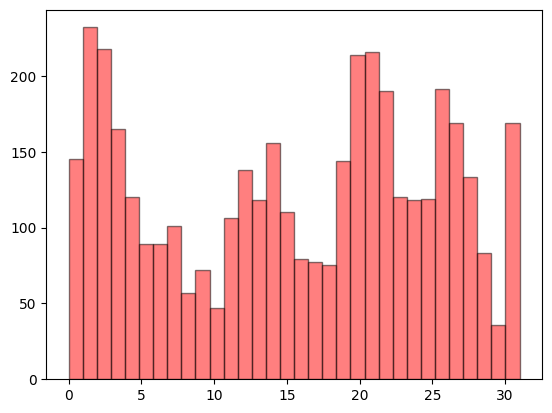

<Figure size 640x480 with 0 Axes>

In [9]:
# generate a histogram of the image
import matplotlib.pyplot as plt
plt.hist(image.ravel(),32,[0,31], color='red', alpha=0.5, ec='black')
plt.show()
plt.savefig('LINCOLN_histogram.png')



In [23]:
print(ord('A'))
print(char_to_value)
print(ord('V'))

65
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31}
86


In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define the mapping of characters '0' to '9' and 'A' to 'V' to numerical values 0 to 31
char_to_value = {chr(48 + i): i for i in range(10)}
char_to_value.update({chr(65 + i): i + 10 for i in range(22)})

filenames = ['LINCOLN', 'JET', 'LISA', 'LIBERTY']

for filename in filenames:
    # Read the .64 file and convert it to a 2D array
    file_path = filename + '.64'
    with open(file_path, 'r') as file:
        lines = file.read().splitlines()
        # Remove the last line if it contains 
        if lines[-1] == '': lines.pop()
        data = [[char_to_value[char] for char in line] for line in lines]

    # Convert the 2D array to a NumPy array
    image_array = np.array(data, dtype=np.uint8)

    # Create an image from the NumPy array
    image = cv2.resize(image_array, (64, 64), interpolation=cv2.INTER_NEAREST)

    # Save the image
    cv2.imwrite(filename + '.png', image)
    # generate a histogram of the image
    plt.hist(image.ravel(),32,[0,31], color='red', alpha=0.5, ec='black')
    # plt.legend(loc='best')
    plt.title(filename)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    # save the histogram
    plt.savefig(filename + '_histogram.png')
    #clear the plot
    plt.clf()

<Figure size 640x480 with 0 Axes>